In [6]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from PIL import Image
from compress import CompressMatrix, draw_vis, ReconstructMatrix, calculate_compression_stats
import numpy as np

plt.style.use('seaborn-v0_8-darkgrid')

In [7]:
def get_color_channel(image, channel):
    height, width = image[:,:,channel].shape
    rgb_array = np.zeros((height, width, 3), dtype=np.uint8)
    rgb_array[:, :, channel] = image[:,:,0]

    return Image.fromarray(rgb_array, mode='RGB')
    
def draw_on_color_channel(image, channel):
    height, width = image.shape
    rgb_array = np.zeros((height, width, 3), dtype=np.uint8)
    rgb_array[:, :, channel] = image[:,:]

    return Image.fromarray(rgb_array, mode='RGB')

def merge_RGB(R, G, B):
    height, width = R.shape
    rgb_array = np.zeros((height, width, 3), dtype=np.uint8)
    rgb_array[:, :, 0] = R
    rgb_array[:, :, 1] = G
    rgb_array[:, :, 2] = B

    return Image.fromarray(rgb_array, mode='RGB')

In [8]:
# def draw_compression_plot(original_image, compressed_image, R_channel, G_channel, B_channel, R_compressed, G_compressed, B_compressed):
#     fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    
#     axs[0, 0].imshow(original_image)
#     axs[0, 0].set_axis_off()
#     axs[0, 0].set_title('Original image')

#     axs[0, 1].imshow(compressed_image)
#     axs[0, 1].set_axis_off()
#     axs[0, 1].set_title('Compressed image')

#     axs[1, 0].imshow(R_channel)
#     axs[1, 0].set_axis_off()
#     axs[1, 0].set_title('R channel (compressed)')
    
#     axs[1, 1].imshow(G_channel)
#     axs[1, 1].set_axis_off()
#     axs[1, 1].set_title('G channel (compressed)')

#     axs[1, 2].imshow(B_channel)
#     axs[1, 2].set_axis_off()
#     axs[1, 2].set_title('B channel (compressed)')

#     axs[2, 0].imshow(R_compressed)
#     axs[2, 0].set_axis_off()
#     axs[2, 0].set_title('R compression matrix')
#     axs[2, 1].imshow(G_compressed)
#     axs[2, 1].set_axis_off()
#     axs[2, 0].set_title('G compression matrix')

#     axs[2, 2].imshow(B_compressed)
#     axs[2, 2].set_axis_off()
#     axs[2, 0].set_title('B compression matrix')

#     fig.delaxes(axs[0, 2])
#     return fig, axs
def draw_compression_plot(original_image, compressed_image, R_channel, G_channel, B_channel, R_compressed, G_compressed, B_compressed, rank, epsilon):
    fig = plt.figure(figsize=(15, 12))

    fig.suptitle(f'Wyniki kompresji dla $maxrank={rank}$ i $epsilon={epsilon}$', fontsize=16)
    ax1 = plt.subplot2grid((3, 6), (0, 0), colspan=3) 
    ax1.imshow(original_image)
    ax1.set_axis_off()
    ax1.set_title('Original image')
    
    ax2 = plt.subplot2grid((3, 6), (0, 3), colspan=3)
    ax2.imshow(compressed_image)
    ax2.set_axis_off()
    ax2.set_title('Compressed image')
    
    ax3 = plt.subplot2grid((3, 6), (1, 0), colspan=2)
    ax3.imshow(R_channel)
    ax3.set_axis_off()
    ax3.set_title('R channel', fontsize=11)
    
    ax4 = plt.subplot2grid((3, 6), (1, 2), colspan=2)
    ax4.imshow(G_channel)
    ax4.set_axis_off()
    ax4.set_title('G channel', fontsize=11)
    
    ax5 = plt.subplot2grid((3, 6), (1, 4), colspan=2)
    ax5.imshow(B_channel)
    ax5.set_axis_off()
    ax5.set_title('B channel', fontsize=11)
    
    # Third row: 3 compression matrices
    ax6 = plt.subplot2grid((3, 6), (2, 0), colspan=2)
    ax6.imshow(R_compressed)
    ax6.set_axis_off()
    ax6.set_title('R compression matrix', fontsize=11)
    
    ax7 = plt.subplot2grid((3, 6), (2, 2), colspan=2)
    ax7.imshow(G_compressed)
    ax7.set_axis_off()
    ax7.set_title('G compression matrix', fontsize=11)
    
    ax8 = plt.subplot2grid((3, 6), (2, 4), colspan=2)
    ax8.imshow(B_compressed)
    ax8.set_axis_off()
    ax8.set_title('B compression matrix', fontsize=11)
    
    plt.tight_layout()

In [9]:
def show_image_compression(R, G, B, rank, epsilon):
    R_original = draw_on_color_channel(R, 0)
    G_original = draw_on_color_channel(G, 1)
    B_original = draw_on_color_channel(B, 2)

    R_compressed = CompressMatrix(R, rank, epsilon)
    G_compressed = CompressMatrix(G, rank, epsilon)
    B_compressed = CompressMatrix(B, rank, epsilon)

    R_image = draw_vis(R_compressed)
    G_image = draw_vis(G_compressed)
    B_image = draw_vis(B_compressed)

    R_rec = ReconstructMatrix(R_compressed, (500, 500))
    G_rec = ReconstructMatrix(G_compressed, (500, 500))
    B_rec = ReconstructMatrix(B_compressed, (500, 500))

    print("Compression ratio: ", calculate_compression_stats(B_compressed, (500, 500))['compression_ratio'])

    merged = merge_RGB(R_rec, G_rec, B_rec)
    draw_compression_plot(image, 
                            merged, 
                            draw_on_color_channel(R_rec, 0), 
                            draw_on_color_channel(G_rec, 1),
                            draw_on_color_channel(B_rec, 2),
                            R_image, 
                            G_image, 
                            B_image,
                            rank,
                            epsilon)
    plt.show()

## Open image

In [10]:
IMAGEFILE = 'img.bmp'

image = Image.open(IMAGEFILE)
im_rgb = np.array(image)

R = im_rgb[:,:,0]
G = im_rgb[:,:,1]
B = im_rgb[:,:,2]


## Plot singular values

In [11]:
import numpy as np
from scipy.linalg import svd


_, R_s_vals, _ = svd(R)
_, G_s_vals, _ = svd(G)
_, B_s_vals, _ = svd(B)


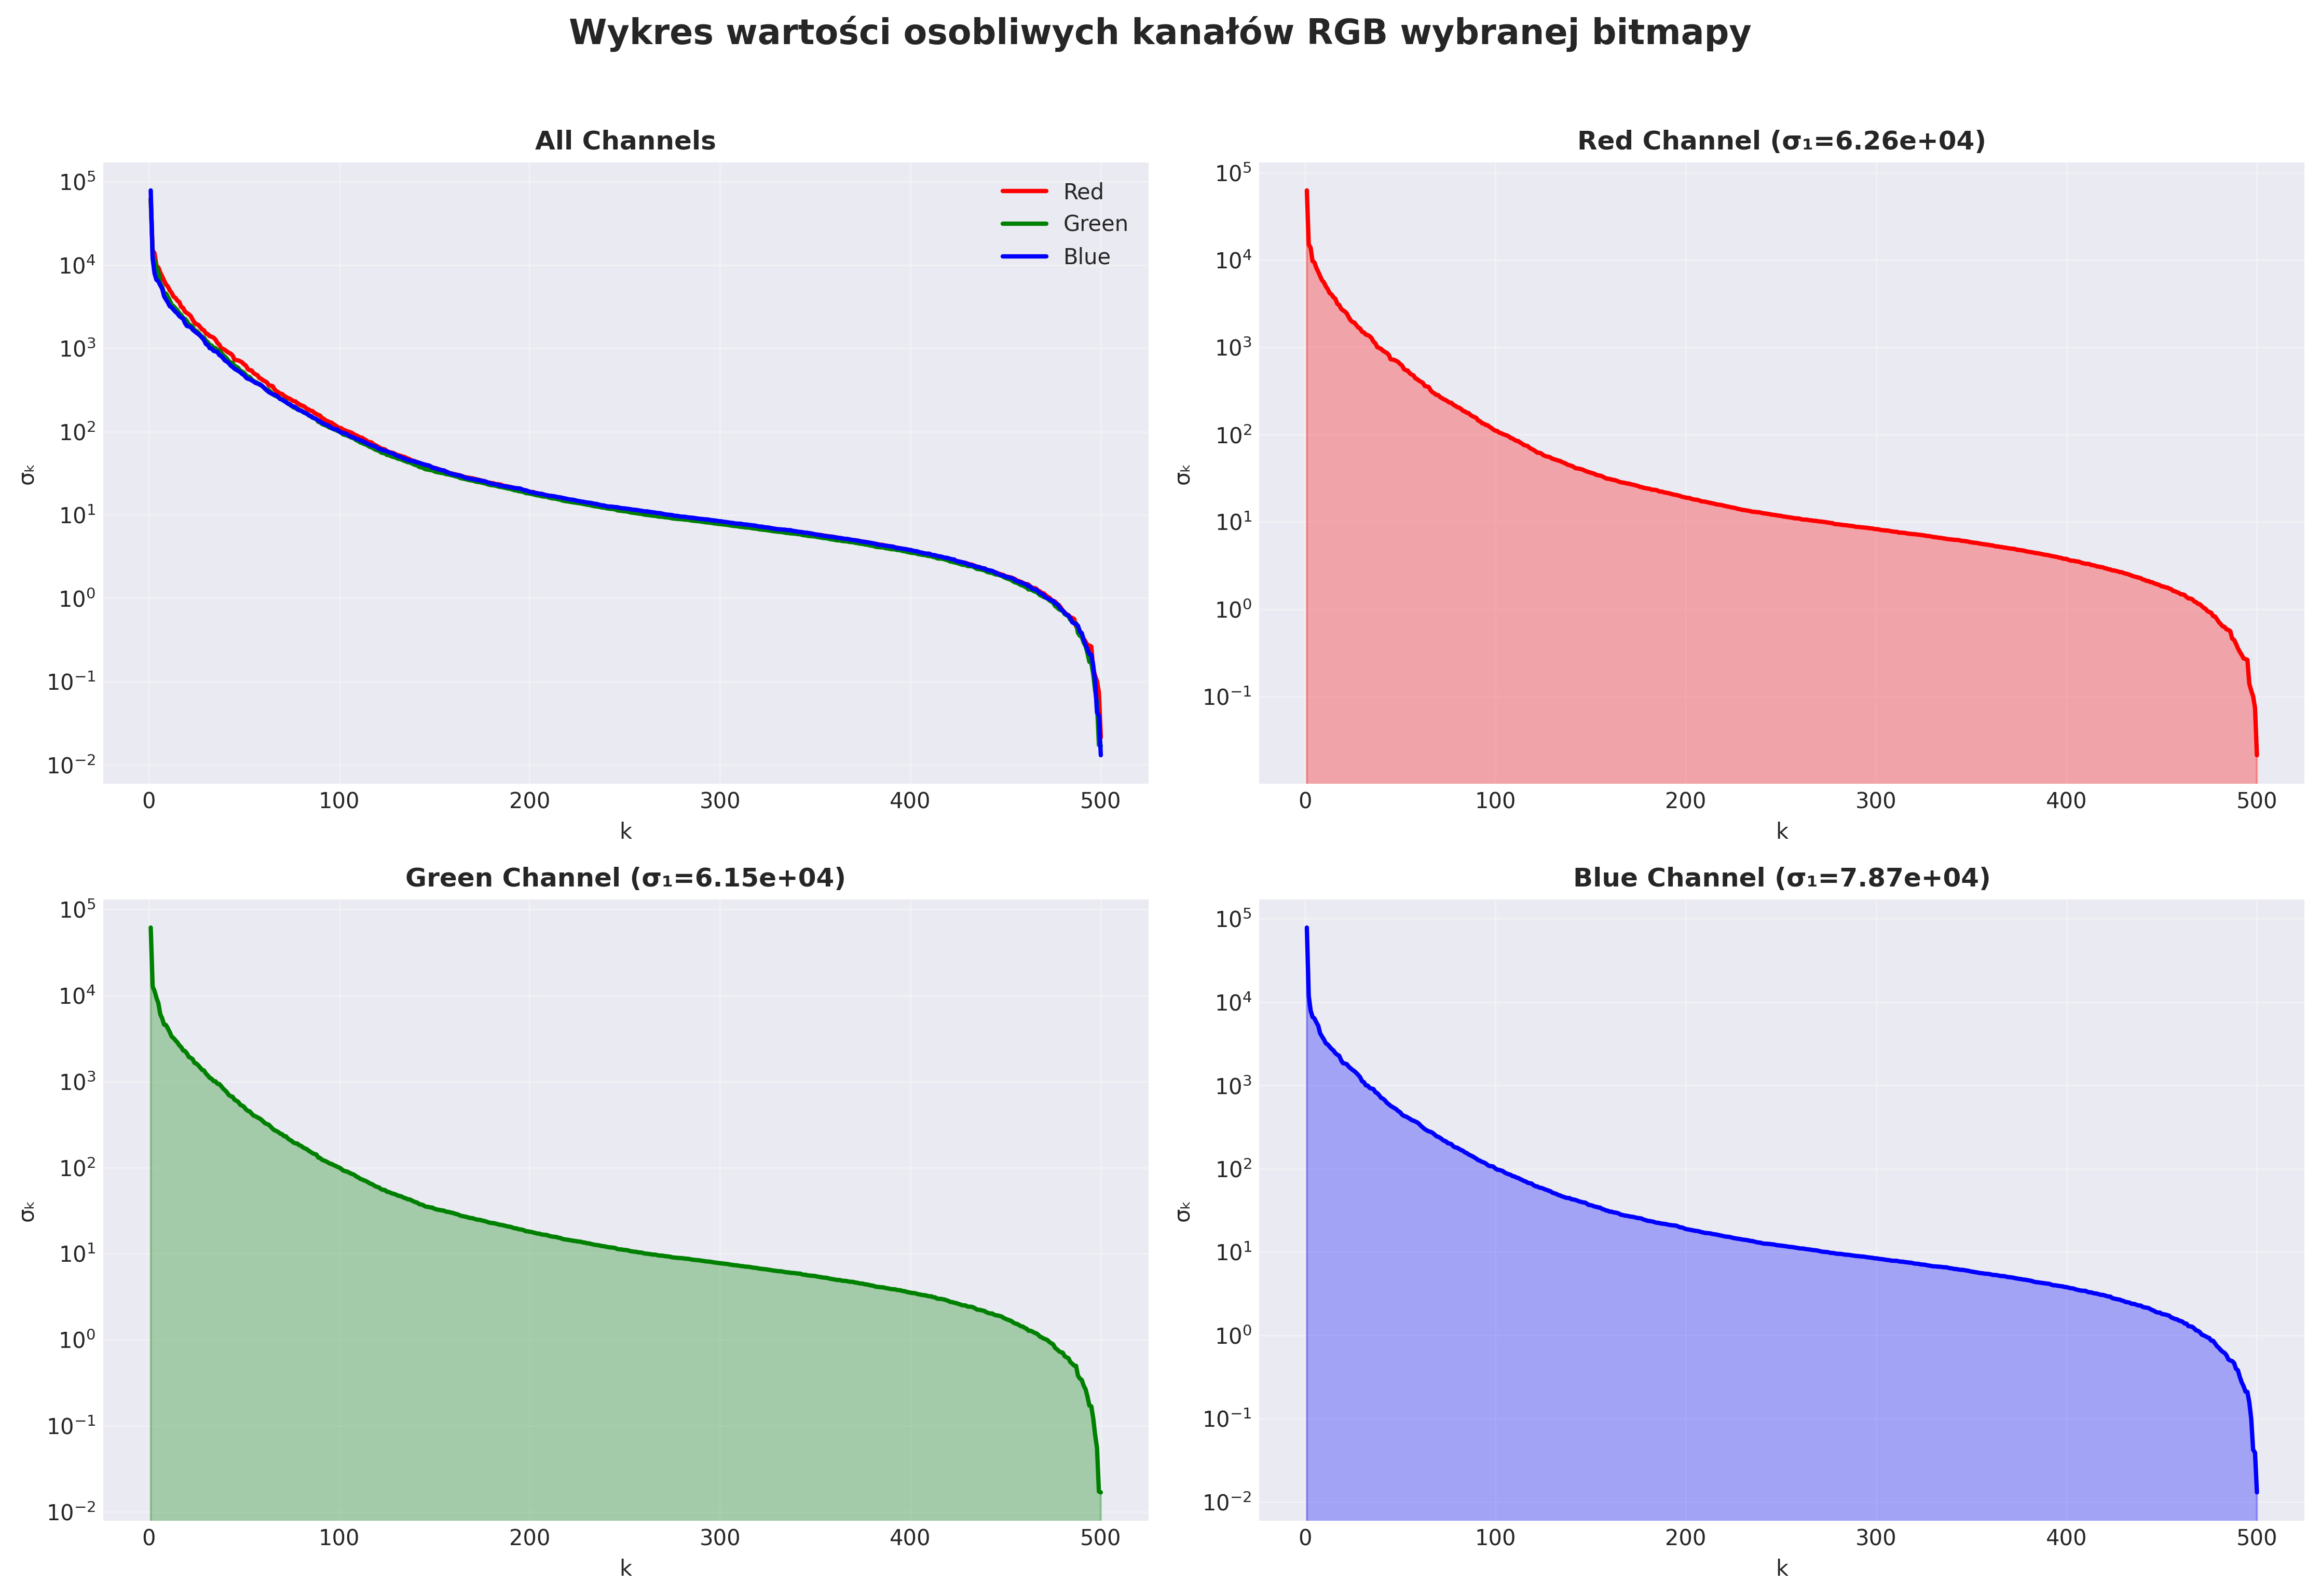

In [12]:

fig, axes = plt.subplots(2, 2, figsize=(15, 10), dpi=300)
x = np.arange(1, len(R_s_vals) + 1)
# Plot 1: All channels together
ax1 = axes[0, 0]
ax1.plot(x, R_s_vals, 'r-', linewidth=2, label='Red')
ax1.plot(x, G_s_vals, 'g-', linewidth=2, label='Green')
ax1.plot(x, B_s_vals, 'b-', linewidth=2, label='Blue')
ax1.set_xlabel('k')
ax1.set_ylabel('σₖ')
ax1.set_title('All Channels', fontsize=12, fontweight='bold')
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Red channel
ax2 = axes[0, 1]
ax2.plot(x, R_s_vals, 'r-', linewidth=2)
ax2.fill_between(x, 0, R_s_vals, color='red', alpha=0.3)
ax2.set_xlabel('k')
ax2.set_ylabel('σₖ')
ax2.set_title(f'Red Channel (σ₁={R_s_vals[0]:.2e})', fontsize=12, fontweight='bold')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)

# Plot 3: Green channel
ax3 = axes[1, 0]
ax3.plot(x, G_s_vals, 'g-', linewidth=2)
ax3.fill_between(x, 0, G_s_vals, color='green', alpha=0.3)
ax3.set_xlabel('k')
ax3.set_ylabel('σₖ')
ax3.set_title(f'Green Channel (σ₁={G_s_vals[0]:.2e})', fontsize=12, fontweight='bold')
ax3.set_yscale('log')
ax3.grid(True, alpha=0.3)

# Plot 4: Blue channel
ax4 = axes[1, 1]
ax4.plot(x, B_s_vals, 'b-', linewidth=2)
ax4.fill_between(x, 0, B_s_vals, color='blue', alpha=0.3)
ax4.set_xlabel('k')
ax4.set_ylabel('σₖ')
ax4.set_title(f'Blue Channel (σ₁={B_s_vals[0]:.2e})', fontsize=12, fontweight='bold')
ax4.set_yscale('log')
ax4.grid(True, alpha=0.3)

fig.suptitle('Wykres wartości osobliwych kanałów RGB wybranej bitmapy', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## Max rank: 1, epsilon: $\sigma_{1}$

Compression ratio:  249.75024975024974


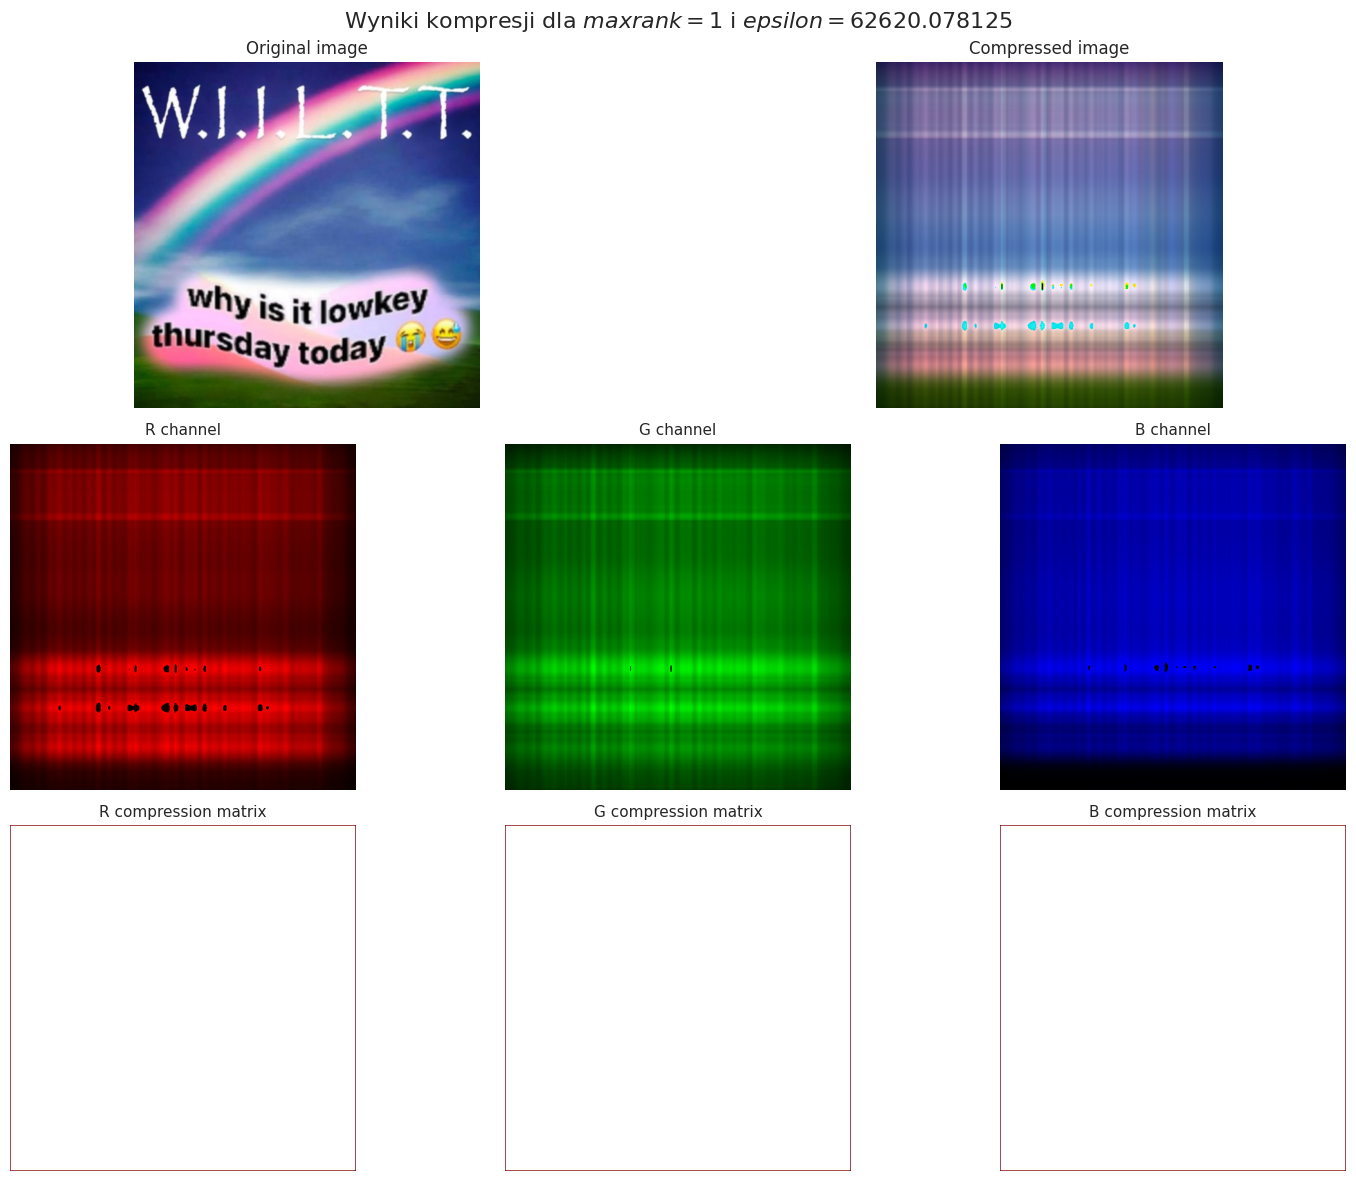

In [13]:
show_image_compression(R, G, B, 1, R_s_vals[0])

## Max rank: 1, epsilon: $\sigma_{2^k}$

Compression ratio:  0.4571186167956351


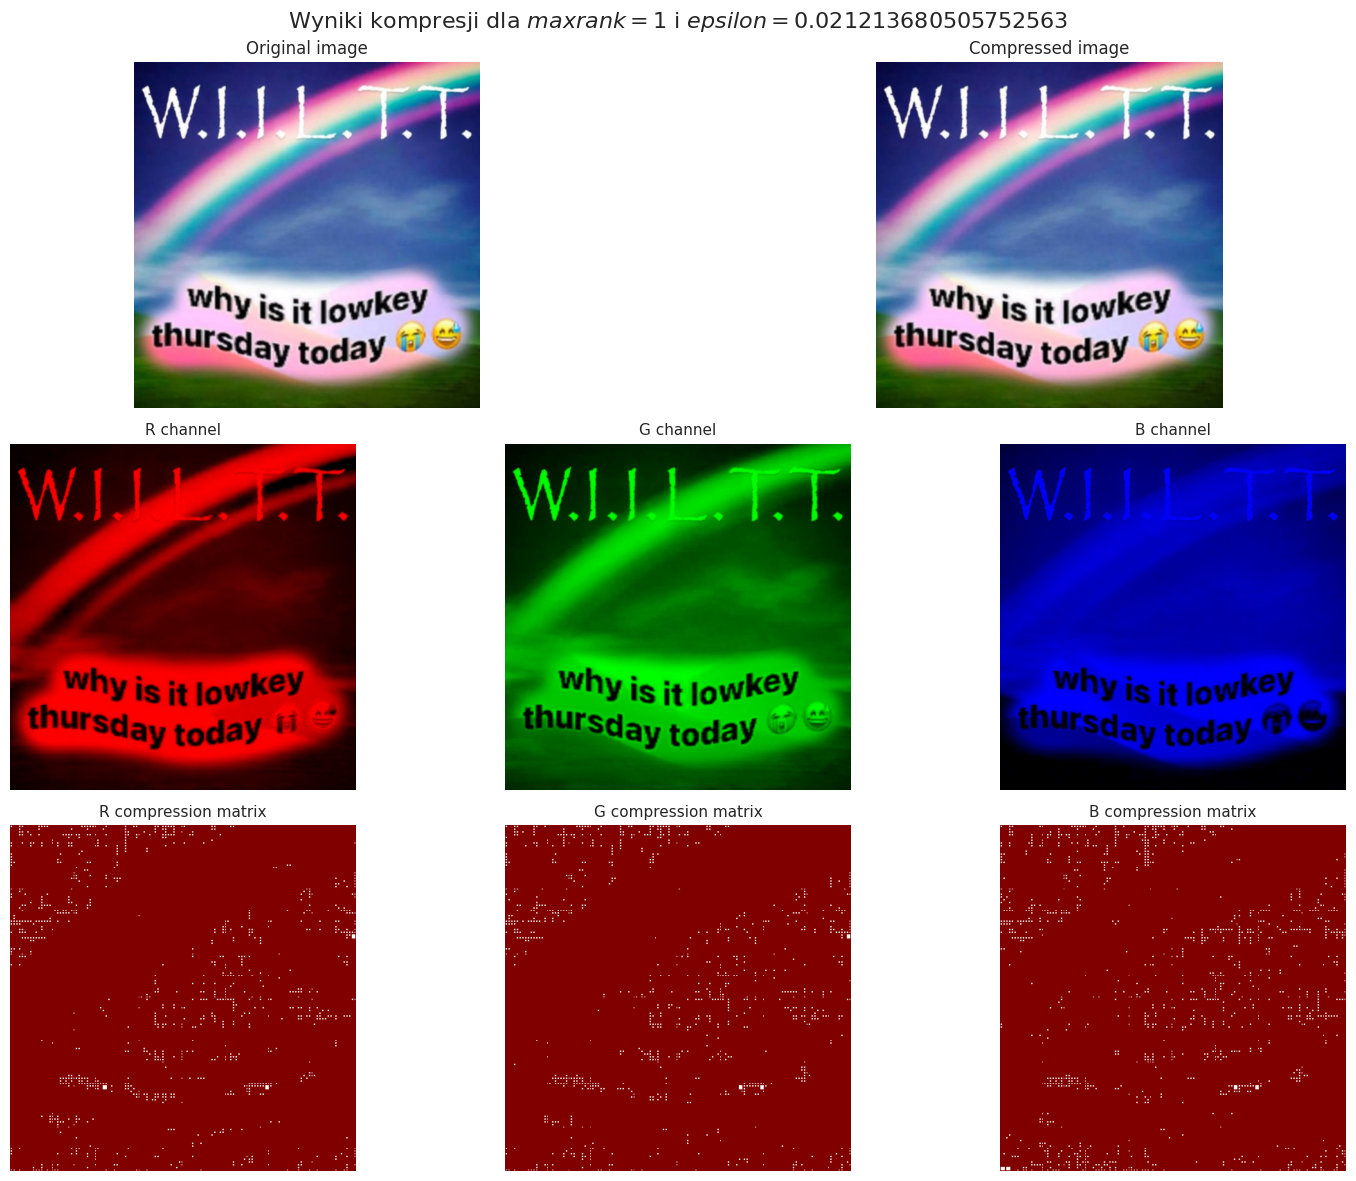

In [14]:
show_image_compression(R, G, B, 1, R_s_vals[-1])

## Max rank: 1, epsilon: $\sigma_{2^k/2}$

Compression ratio:  2.545928551061143


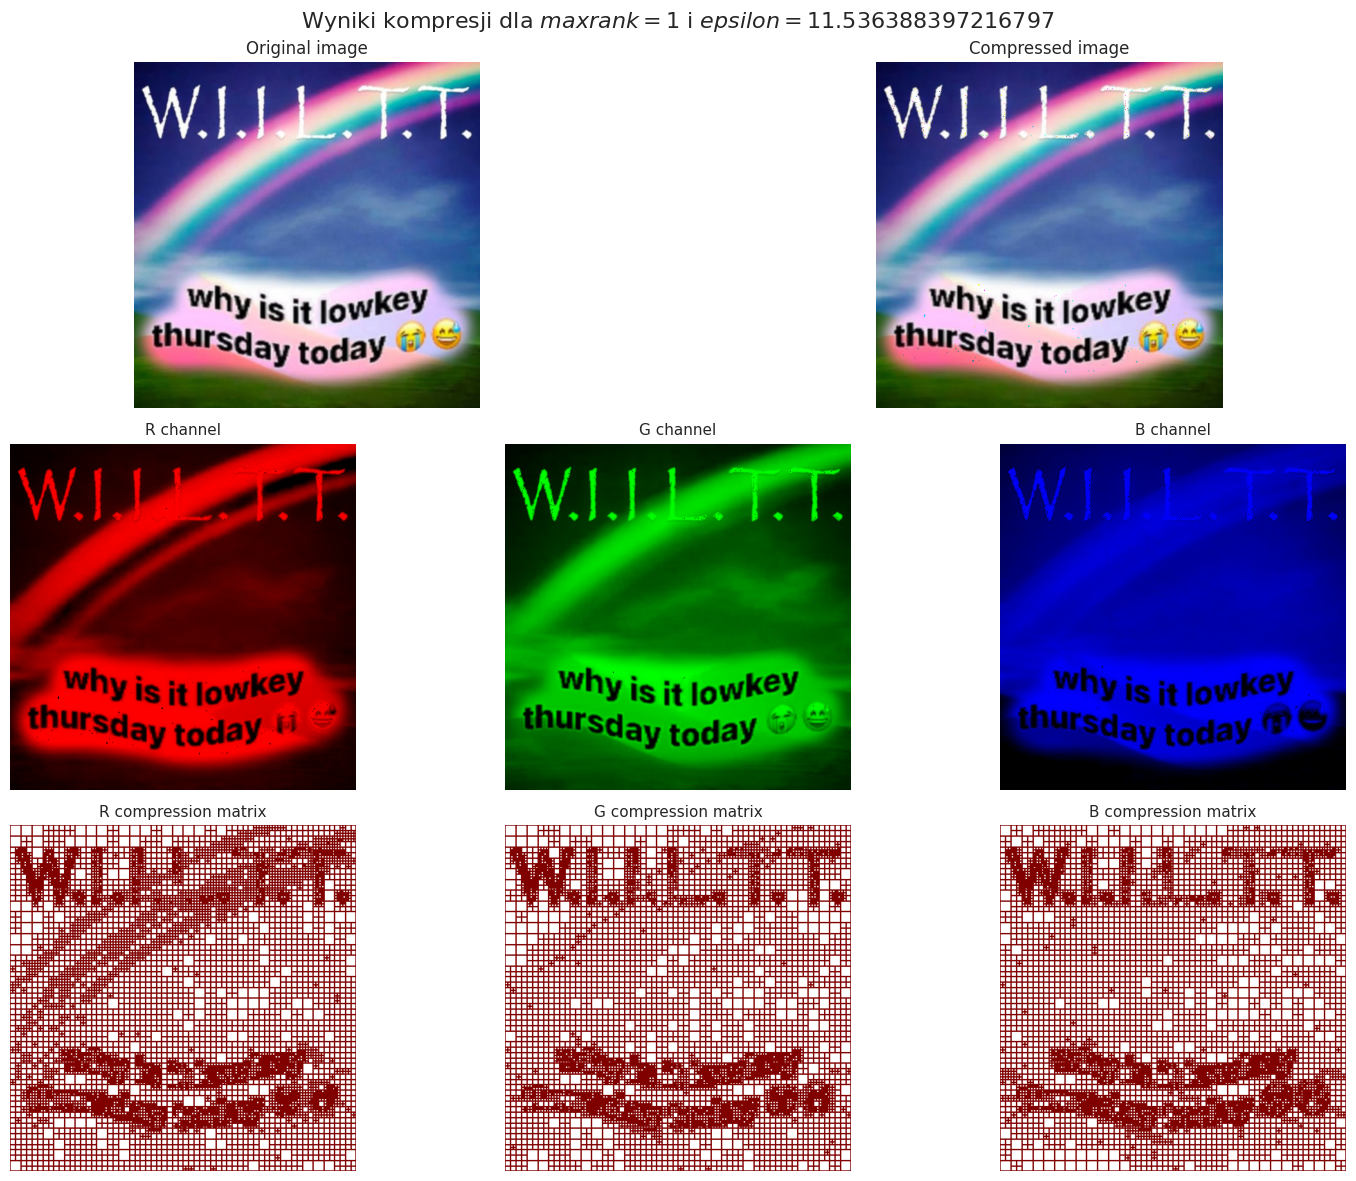

In [15]:
show_image_compression(R, G, B, 1, R_s_vals[len(R_s_vals) // 2])

## Max rank: 4, epsilon: $\sigma_{1}$

Compression ratio:  62.437562437562434


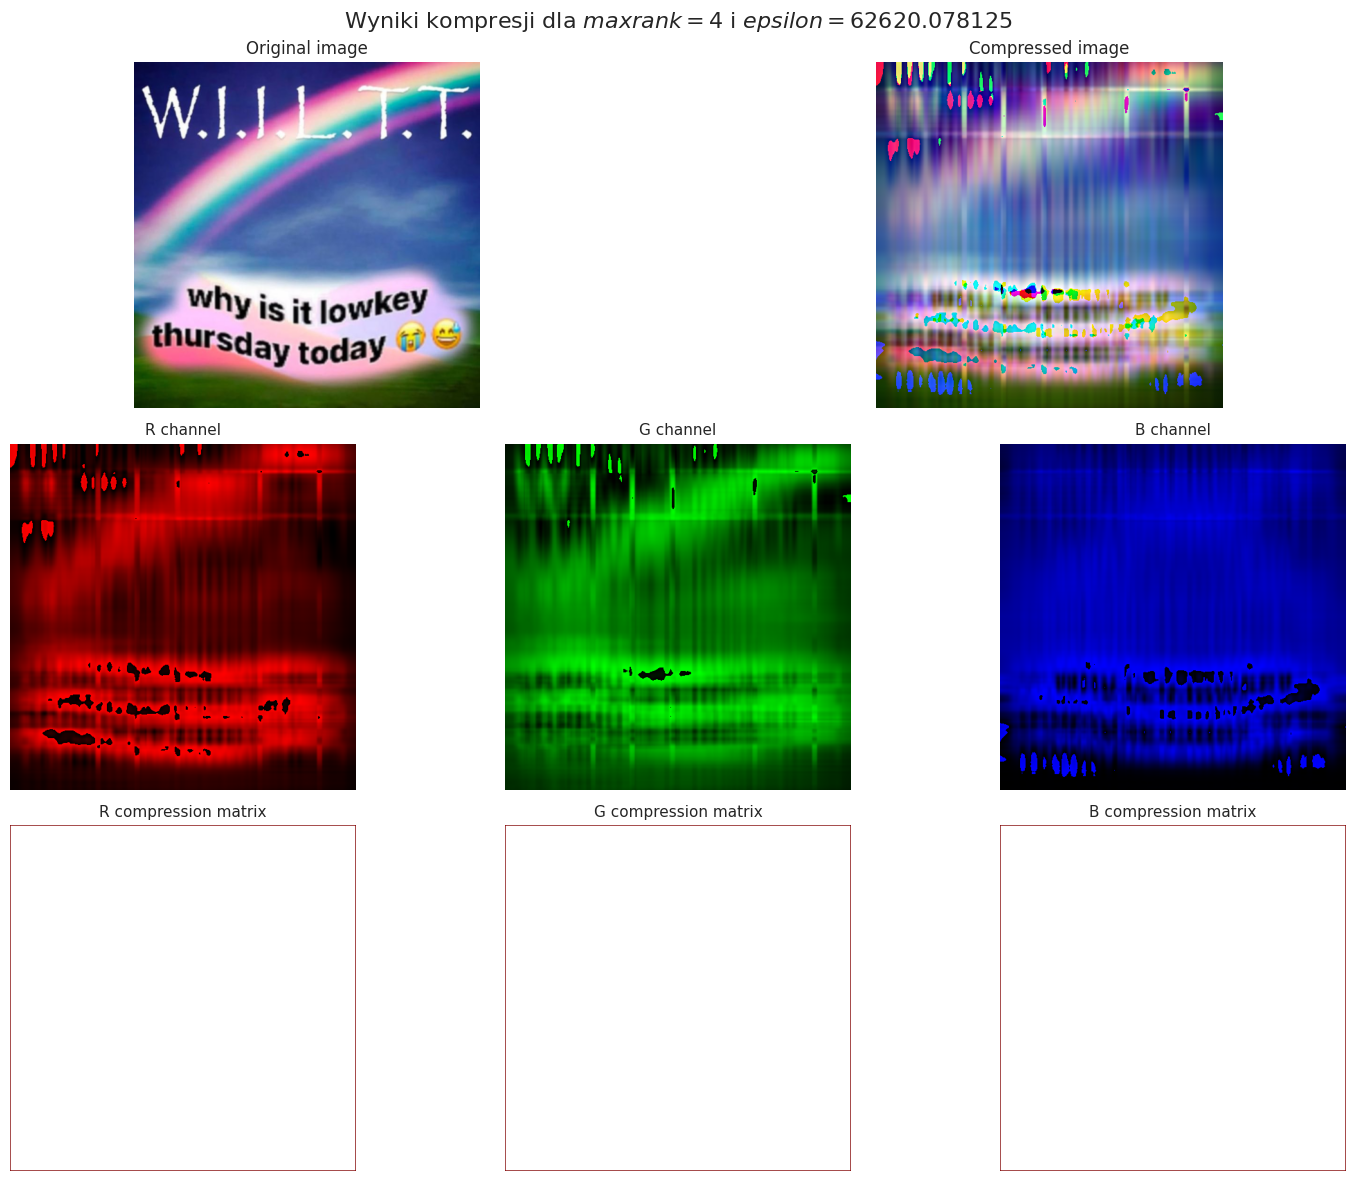

In [16]:
show_image_compression(R, G, B, 4, R_s_vals[0])

## Max rank: 4, epsilon: $\sigma_{2^k}$

Compression ratio:  0.468930538257229


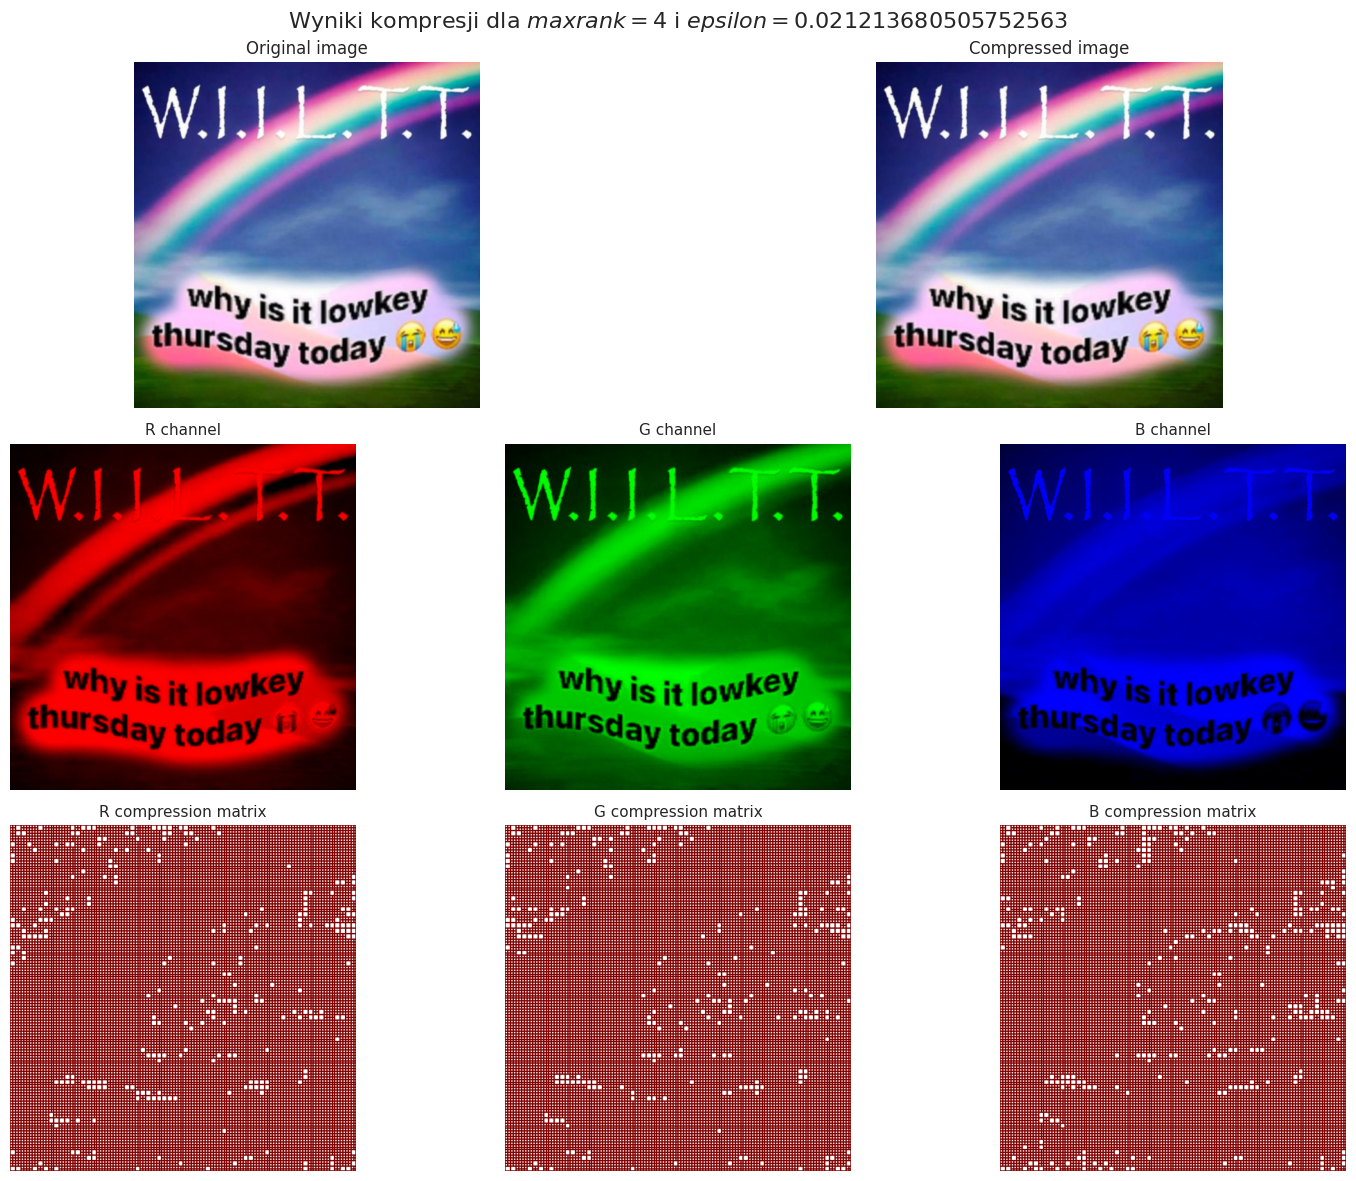

In [17]:
show_image_compression(R, G, B, 4, R_s_vals[-1])

## Max rank: 4, epsilon: $\sigma_{2^k/2}$

Compression ratio:  1.8356977119863718


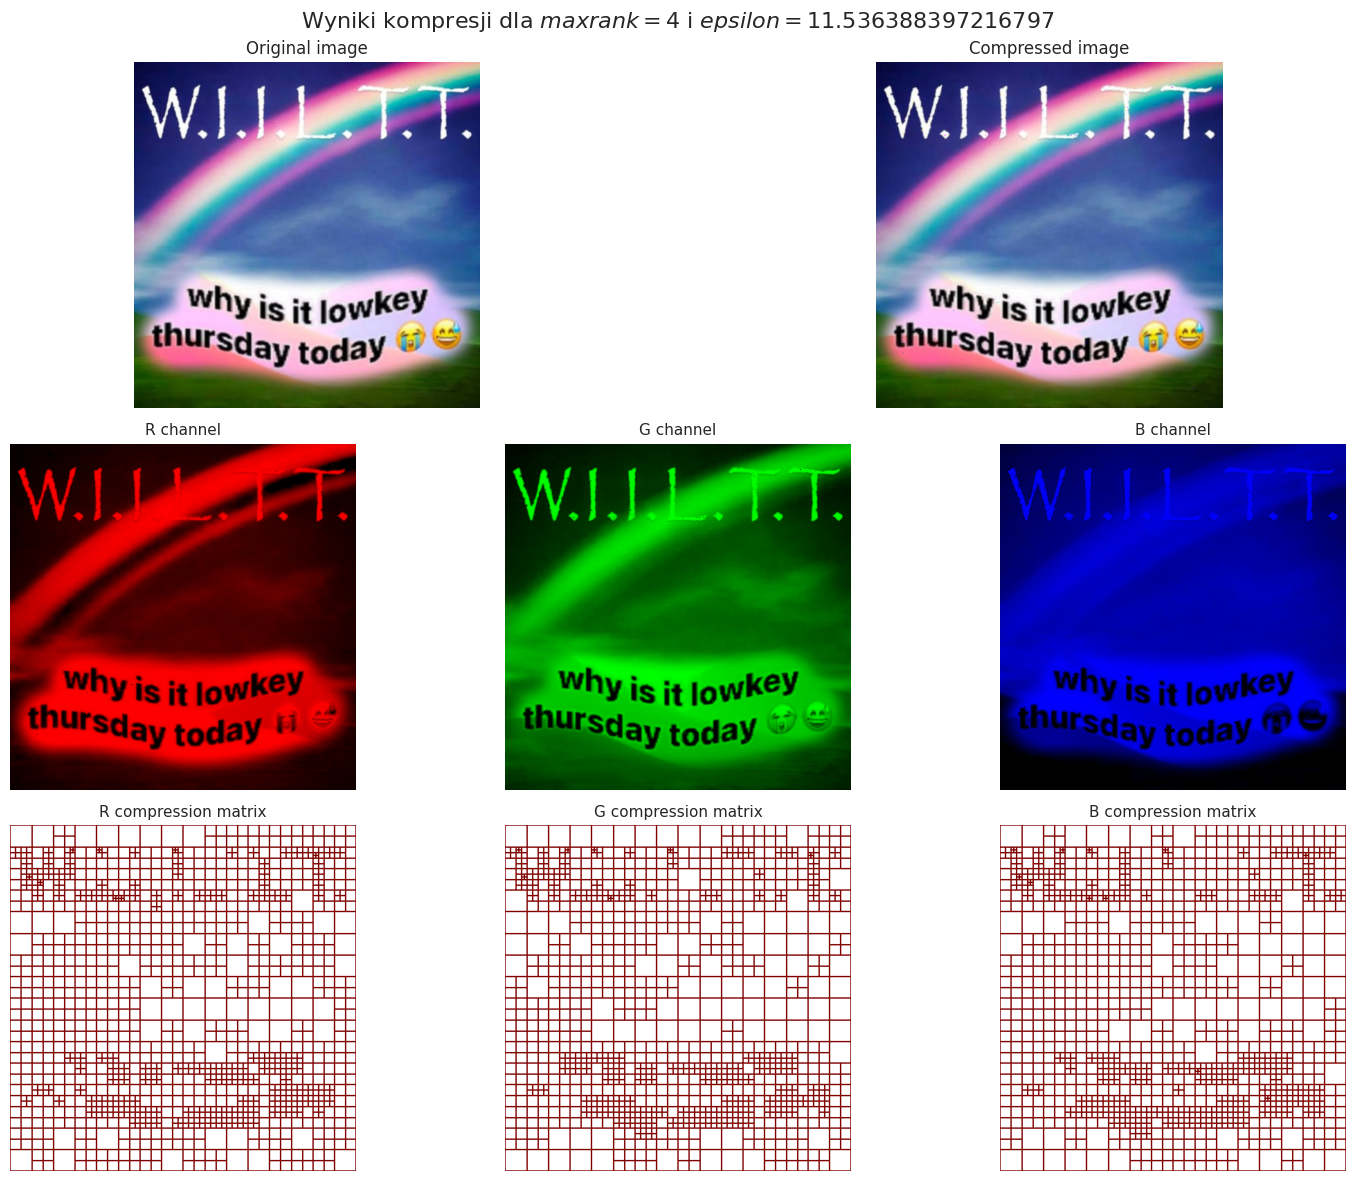

In [18]:
show_image_compression(R, G, B, 4, R_s_vals[len(R_s_vals)//2])

Compression ratio:  5.4051716682521835


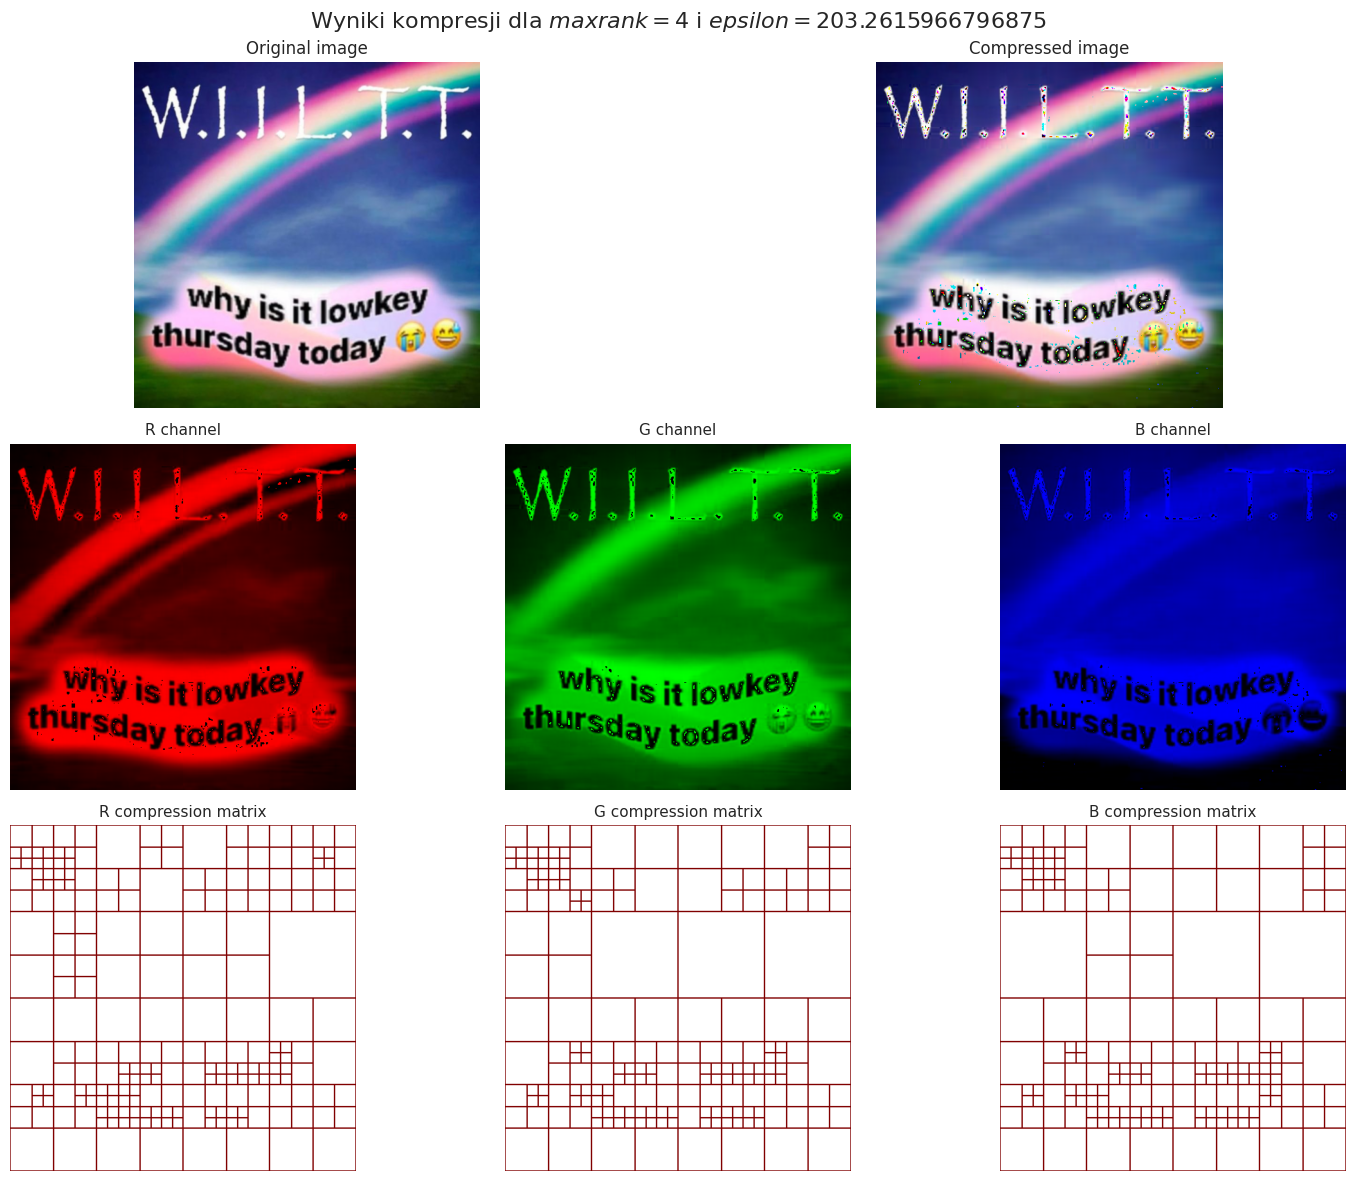

In [19]:
show_image_compression(R, G, B, 4, R_s_vals[80])